### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


# import warnings
# warnings.filterwarnings('ignore')


### Read and clean data

In [8]:
df = pd.read_csv("data/meteorite-landings.csv")
X = df.columns
y = df['recclass']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

### High-level overview of data

In [9]:
results = dict()

for feature in ["mass (g)", "year", "reclat", "reclong"]:
    mean = df[feature].mean()
    std = df[feature].std()
    results[feature] = {"mean": mean, "std": std}

for feature in ["recclass", "fall"]:
    results[feature] = df[feature].value_counts()


results

{'mass (g)': {'mean': 13278.078548601512, 'std': 574988.876410473},
 'year': {'mean': 1991.8288167308751, 'std': 25.052766117703726},
 'reclat': {'mean': -39.12258031142418, 'std': 46.37851135669318},
 'reclong': {'mean': 61.074318526236304, 'std': 80.64729807908505},
 'recclass': L6                8285
 H5                7142
 L5                4796
 H6                4528
 H4                4211
                   ... 
 L/LL~4               1
 R4/5                 1
 H/L6-melt rock       1
 H/L3.6               1
 L/LL(?)3             1
 Name: recclass, Length: 466, dtype: int64,
 'fall': Found    44609
 Fell      1107
 Name: fall, dtype: int64}

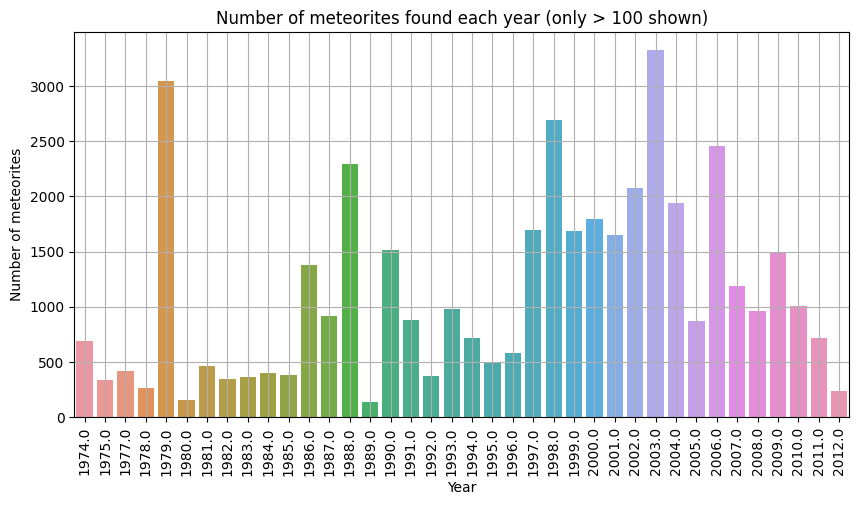

In [10]:
# Calculate how many meteorites fell in each year
year_counts = df.groupby("year").count()["name"]
# Drop years with less than 10 meteorites
year_counts = year_counts[year_counts > 100]

# convert year_counts to int
year_counts = year_counts.astype(int)

# Plot the number of meteorites that fell each year
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Number of meteorites")
plt.title("Number of meteorites found each year (only > 100 shown)")
plt.show()

In [11]:
# Plot the masses of the meteorites
sns.lineplot(df["mass (g)"])
plt.grid(True)
plt.xlabel("Mass (g)")
plt.ylabel("Number of meteorites")
plt.title("Mass of meteorites found")
plt.show()


MAP STUF

In [ ]:
# show a map of the world with the meteorite landings
import folium
from folium.plugins import HeatMap

# Create a map of the world
m = folium.Map(location=[0, 0])

heat_df = df[["reclat", "reclong"]].dropna()
heat_df = heat_df.dropna(axis=0, subset=["reclat", "reclong"])
heat_data = [[row["reclat"], row["reclong"]] for _, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Add a marker for every meteorite
# for index, row in df.iterrows():
#     if not pd.isnull(row["reclat"]) and not pd.isnull(row["reclong"]):
#         folium.Marker(
#             location=[row["reclat"], row["reclong"]],
#             popup=row["name"],
#         ).add_to(m)

# Show the map
m